# Project Background
Divvy is an easy, affordable, and super-fun way to explore Chicago with various type of bike to rent and be on your way. The objective is to maximize the number of annual memberships as it would contribute to the company's future success.

This case study is going to be analyzed using Google's 6 Steps of the Data Analysis Process
1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act

# 1. Ask
As an analyst, here the main objective here is to understand how casual riders and annual riders uses the services differently with the **main goal of transitioning casual to membered riders**. In short, this phase improved clarity and understanding based on the difference of casual and member riders behavior in using the services.

# 2. Prepare

As the data is already collected by Motivate International Inc. we can determine the data types for analysis. The data type used is data set for 4 months, focusing on Q1 of 2024 (January to April 2024) and it consists of several column which can be described as:
1. `ride_id` (Numerical): a 16-digits unique number that defines each ride.
2. `rideable_type` (categorical): types of bikes rented by the customer.
3. `started_at` (categorical): shows the coordinate location of which the ride started at.
4. `ended_at` (categorical): shows the coordinate location of which the ride ended at.
5. `start_station_name` (categorical): shows the name of the station which the ride started at.
6. `start_station_id` (categorical): shows the station id where the ride started.
7. `end_station_name` (categorical): shows the name of the station which the ride ended at.
8. `end_station_id`(categeorical_: shows the station id where the ride ended.)
9. `start_lat` (numerical): the latitude where the ride started.
10. `start_lng`
11. `end_lat` (numerical): the latitude where the ride ended
12. `end_lng`
13. `member_casual` (categorical): shows which types of customer it is (member or casual)

# 3. Process

### 3.1 Data Cleaning

The first step of process includes filtering and cleaning the data, exploring the data to identify trends and patterns and integrating it with the main goal to ensure the data quality.
Load the invidual file and combine into one dataframe.

In [1]:
import pandas as pd

jan_2024 = pd.read_csv('202401-divvy-tripdata.csv')
feb_2024 = pd.read_csv('202402-divvy-tripdata.csv')
mar_2024 = pd.read_csv('202403-divvy-tripdata.csv')
apr_2024 = pd.read_csv('202404-divvy-tripdata.csv')

df = pd.concat([jan_2024, feb_2024, mar_2024, apr_2024])

df.shape

(1084749, 13)

Identify the amount of columns and rows.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084749 entries, 0 to 415024
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1084749 non-null  object 
 1   rideable_type       1084749 non-null  object 
 2   started_at          1084749 non-null  object 
 3   ended_at            1084749 non-null  object 
 4   start_station_name  923118 non-null   object 
 5   start_station_id    923118 non-null   object 
 6   end_station_name    913190 non-null   object 
 7   end_station_id      913190 non-null   object 
 8   start_lat           1084749 non-null  float64
 9   start_lng           1084749 non-null  float64
 10  end_lat             1083268 non-null  float64
 11  end_lng             1083268 non-null  float64
 12  member_casual       1084749 non-null  object 
dtypes: float64(4), object(9)
memory usage: 115.9+ MB


Check for null values

In [3]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    161631
start_station_id      161631
end_station_name      171559
end_station_id        171559
start_lat                  0
start_lng                  0
end_lat                 1481
end_lng                 1481
member_casual              0
dtype: int64

Delete the identified null values

In [4]:
df.dropna(inplace = True)
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Remove column that are not necessary for the analysis

In [5]:
df = df.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1)

Check for duplicated values and delete duplicates

In [6]:
df.duplicated().sum()
df.drop_duplicates()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,member
...,...,...,...,...,...
414862,9CAD5CA1DA4AC50C,classic_bike,2024-04-22 21:05:10,2024-04-22 21:16:31,casual
414871,AD91174811F39262,electric_bike,2024-04-08 10:28:17,2024-04-08 10:43:25,member
414987,9771E1C1AEEDCB9F,electric_bike,2024-04-26 20:34:14,2024-04-26 20:39:48,member
414990,0B583B099760D2BC,electric_bike,2024-04-09 07:31:56,2024-04-09 07:41:43,member


### 3.2 Modify the datatype for certain columns

In [7]:
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826620 entries, 0 to 415021
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ride_id        826620 non-null  object        
 1   rideable_type  826620 non-null  object        
 2   started_at     826620 non-null  datetime64[ns]
 3   ended_at       826620 non-null  datetime64[ns]
 4   member_casual  826620 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 37.8+ MB


### 3.3 Create new columns that extract the hour, date, day, and month

In [8]:
df['hour'] = df['started_at'].dt.hour
df['date'] = df['started_at'].dt.day
df['day'] = df['started_at'].dt.day_name()
df['month'] = df['started_at'].dt.month_name()

df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,date,day,month
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,member,15,12,Friday,January
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,member,15,8,Monday,January
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,member,12,27,Saturday,January
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,member,16,29,Monday,January
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,member,5,31,Wednesday,January


### 3.4 Rearrange the days or months extracted in order.

In [9]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
               'Saturday', 'Sunday']

df['day'] = pd.Categorical(df['day'], categories=day_ordered, ordered=True)

month_ordered = ['January', 'February', 'March', 'April']

df['month'] = pd.Categorical(df['month'], categories=month_ordered, ordered=True)

### 3.5 Create a new column that calculates the duration of each ride.

In [10]:
df['ride_duration'] = (df['ended_at']-df['started_at'])/pd.Timedelta(minutes=1)

df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,date,day,month,ride_duration
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,member,15,12,Friday,January,7.533333
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,member,15,8,Monday,January,7.216667
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,member,12,27,Saturday,January,8.000000
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,member,16,29,Monday,January,29.816667
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,member,5,31,Wednesday,January,26.200000


### 3.6 Verify Column Values
Verify whether there were negative values for the ride duration

In [11]:
df[df['ride_duration'] < 0].count()

ride_id          10
rideable_type    10
started_at       10
ended_at         10
member_casual    10
hour             10
date             10
day              10
month            10
ride_duration    10
dtype: int64

Remove the ride duration that has a negative value

In [12]:
df = df[df['ride_duration'] > 0]
df[df['ride_duration'] < 0].count()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
hour             0
date             0
day              0
month            0
ride_duration    0
dtype: int64

### 3.7 Finalize the clean dataset
Export the prepared dataset to a csv file.

In [13]:
df.to_csv("Q1-divvy-cleaned.csv")

# 4. Analyze

## 4.1 Analysis of the number of casual and membered riders.
By identifying the numbers of the casual and membered riders will allow us to calculate and understand better how these types of customers differ by amount.

### 4.1.1 Number of riders taken by casual and membered riders.


In [14]:
members_amount1 = df['member_casual'].value_counts()
members_amount1

member_casual
member    613879
casual    212608
Name: count, dtype: int64

There are a total of over 800k rides during Q1 of 2024, where over 600k were from membered riders which is expected with membership riders would want to ride more to fully maximize their membership.

### 4.1.2 Percentage of casual and membered riders

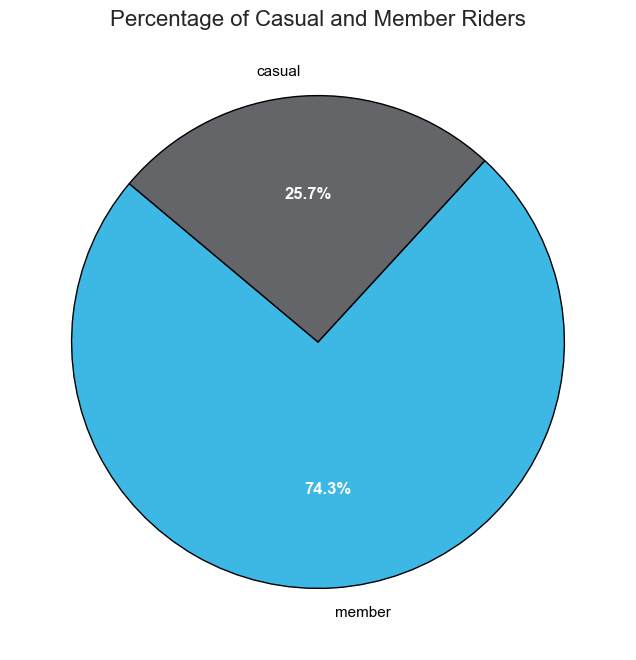

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

member_percentage = df['member_casual'].value_counts(normalize=True) * 100

member_percentage_df = member_percentage.reset_index()
member_percentage_df.columns = ['member_casual', 'percentage'] 

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))

colors = {'casual': '#636569',
          'member': '#3DB7E4'}

color_list = [colors[member] for member in member_percentage_df['member_casual']]

wedges, texts, autotexts = ax.pie(member_percentage_df['percentage'], labels=member_percentage_df['member_casual'],
                                  autopct='%1.1f%%', startangle=140, colors=color_list, wedgeprops={'edgecolor': 'black'})

for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

ax.set_title('Percentage of Casual and Member Riders', fontsize=16)

plt.show()

It can be seen from the graph that membered riders have the highest rides due to the tendencies of them to ride more to fully maximize their membership.

Analyze number of rides by expanding the amount of rides taken by casual and membered riders through different hours, different days of the week, and different months of 2024 Q1.

## 4.2 Analysis of the number of rides

This analysis expands to the number of rides taken throughout different hours, different days of the week, and different months in Q1 of 2024.

### 4.2.1 Number of rides taken thoughout different hours in a day

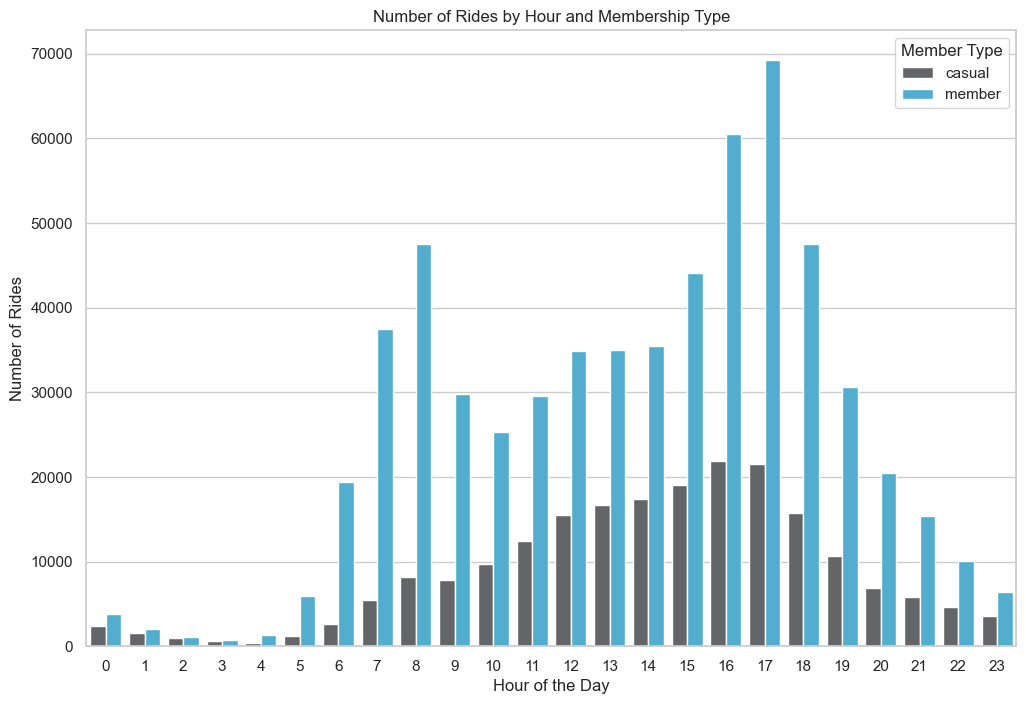

In [33]:
import warnings
warnings.filterwarnings('ignore', message="The default of observed=False is deprecated and will be changed to True in a future version of pandas.")

# Define the color palette
colors = {'casual': '#636569', 'member': '#3DB7E4'}

# Calculate the number of rides per hour, day, and month
rides_hour = df.groupby(['member_casual', 'hour'], as_index=False)['ride_id'].count()
rides_day = df.groupby(['member_casual', 'day'], as_index=False)['ride_id'].count()
rides_month = df.groupby(['member_casual', 'month'], as_index=False)['ride_id'].count()

sns.set(style="whitegrid")

# Create a color palette list for the barplot
palette = [colors['casual'], colors['member']]

plt.figure(figsize=(12, 8))
sns.barplot(x='hour', y='ride_id', hue='member_casual', data=rides_hour, palette=palette, errorbar=None)
plt.title("Number of Rides by Hour and Membership Type")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.legend(title='Member Type')
plt.show()


The stacked bar chat implies that the peak time for bike usage differs between casual and member riders, which are:

1. Casual riders peak time were in between **3 pm to 5 pm**,
2. Whereas the member riders have two peak times between **7 am to 8 am and 4 am to 5 am**.

A simple explanation for this is that the morning peak is due to people **starting their day**, either for exercise or commutting to their office. For the afternoon peak, it is the period where people finish and **leave their work from office, then commute using bikes**.

### 4.2.2 Number of rides taken throughout different days of the week.

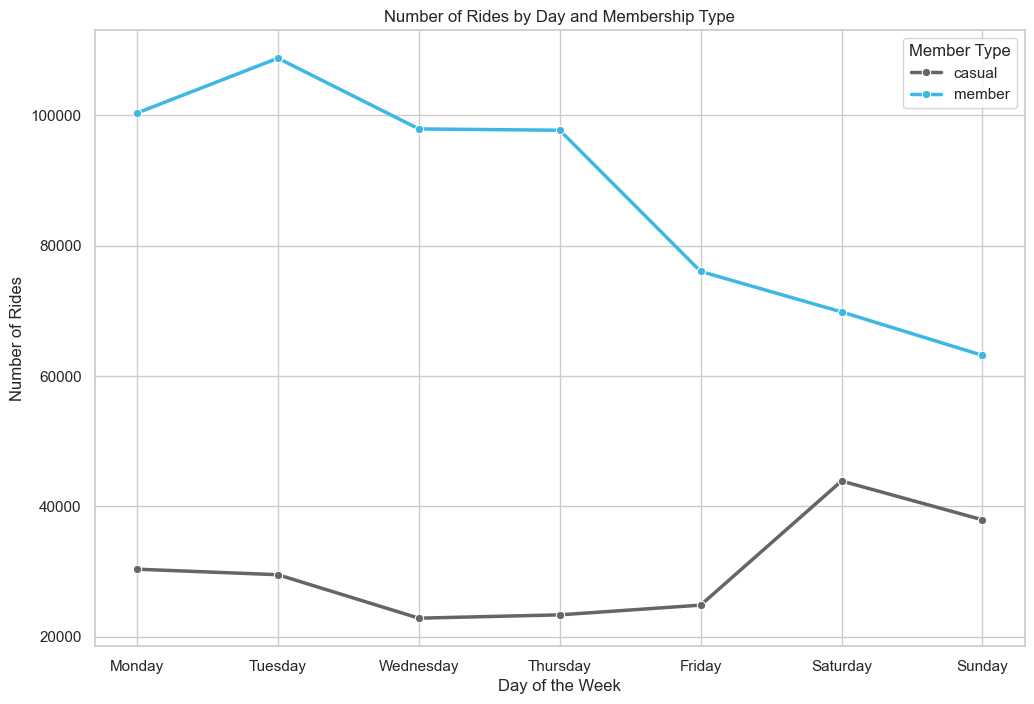

In [35]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='day', y='ride_id', hue='member_casual', data=rides_day, palette=palette, 
             linewidth=2.5, marker='o', errorbar=None)
plt.title("Number of Rides by Day and Membership Type")
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.legend(title='Member Type')
plt.show()

It can be seen from the line graph above that there are **2 findings** that divides the intention of casual and membered riders apart.

1. Casual riders rode the bikes mainly during the weekends, it can be seen by the **increase of rides taken in Friday to Saturday**, which implies that the casual riders rode the bikes generally only for **leissure**, and not routinely for work.
2. In contrast, the membered riders' ride **remains steady during the weekdays and decreased during the weekends** which implies that membered riders rode the bikes **routinely for work**.

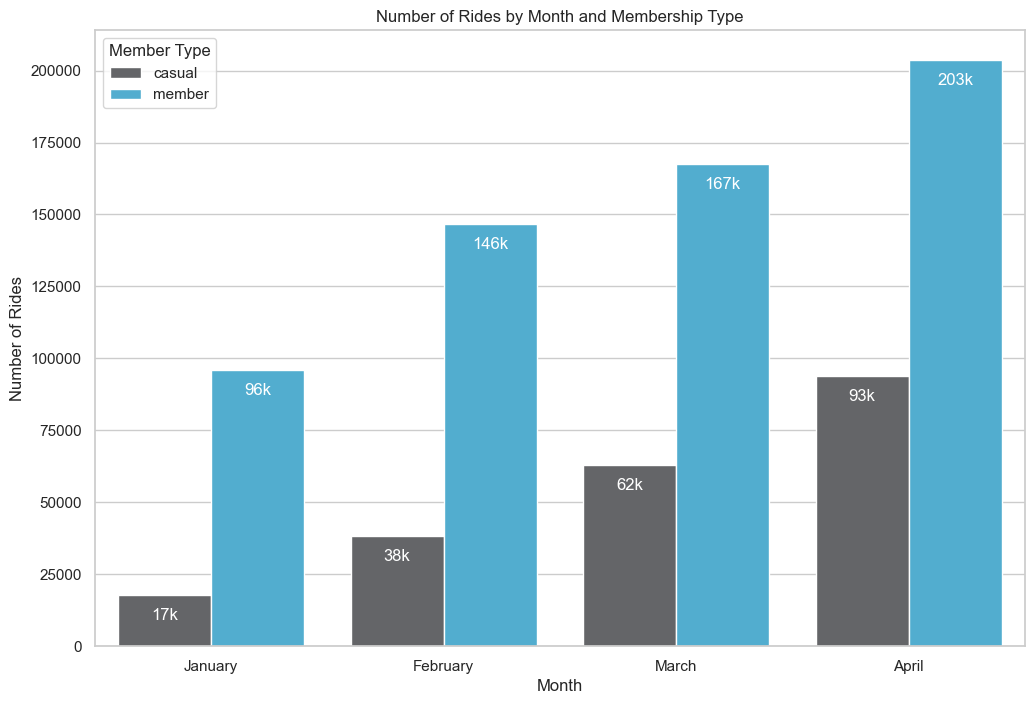

In [38]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='month', y='ride_id', hue='member_casual', data=rides_month,
                      palette=palette, errorbar=None)

# Format labels to show in thousands (i.e. 12000 becomes 12k)
def format_thousands(x):
    return f'{int(x / 1000)}k'

for container in barplot.containers:
    labels = [format_thousands(val) for val in container.datavalues]
    barplot.bar_label(container, labels=labels, label_type='edge', fontsize=12, color='white', rotation=0,padding=-20)

plt.title('Number of Rides by Month and Membership Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend(title='Member Type')
plt.show()

Analyzing the bar chart, there are several implications from the observations.

1. The peak month were March - April. This is attributed to the fact that in March - April, the winter is slowing down and encouraged people to do more outdoor activities, including cycling.
2. The off-peak months were January - February, which had the least amount of rides due to the fact that this two months were during the winter season which makes people do not want to go for doing outdoor cycling.
3. On the Q1, membered riders exceeded casual riders. This is attributed to the fact that membered riders rode the bikes mainly for their daily commute to work regardless of the weather being cold or warm.

## 4.3 Analysis of ride durations

### 4.3.3 Ride durations throughout different days of the week.

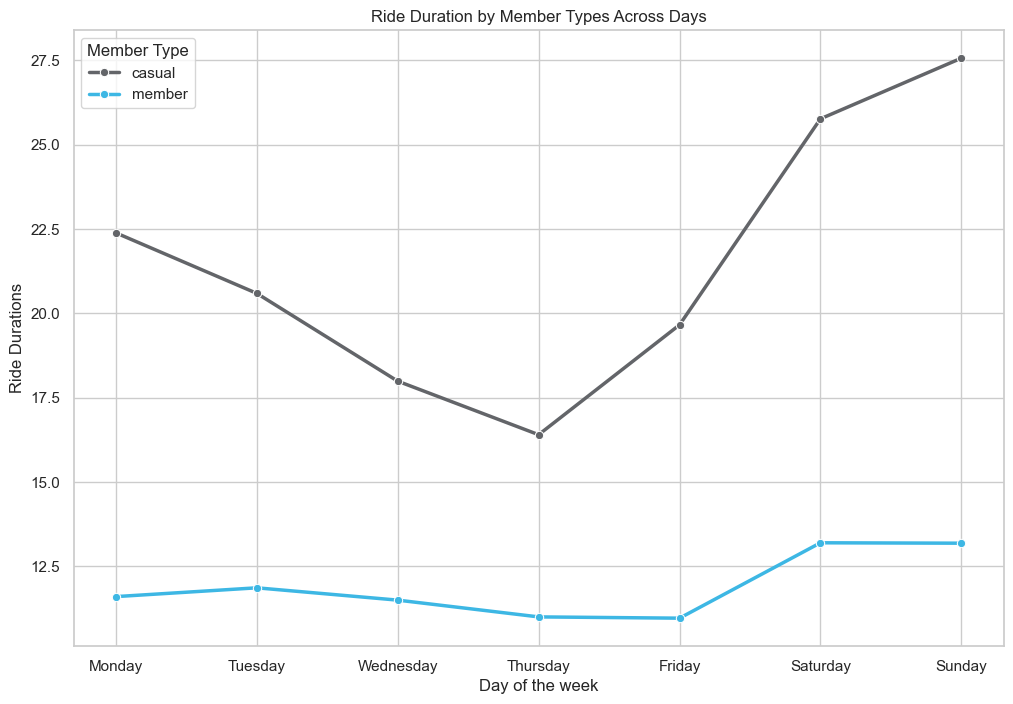

In [40]:
warnings.filterwarnings('ignore', message="The default of observed=False is deprecated and will be changed to True in a future version of pandas.")

ride_duration_day = df.groupby(['member_casual', 'day'], as_index=False)['ride_duration'].mean()

plt.figure(figsize=(12 ,8))
sns.lineplot(x='day', y='ride_duration', hue='member_casual', data=ride_duration_day, 
             palette=palette, linewidth=2.5, marker='o', errorbar=None)
plt.title('Ride Duration by Member Types Across Days')
plt.xlabel('Day of the week')
plt.ylabel('Ride Durations')
plt.legend(title='Member Type')
plt.show()

The line plot implies that **casual riders rode much longer than membered riders**, nearly twice the amount of membered riders.
One reason would be that casual riders rode the bikes for leissure and spent more time enjoying the cycle, while membered riders rode the bikes routinely for commutting.

This is evident as the **duration of the rides increased during the weekends** for both casual and membered riders as people had more free time for leissure-cycling in the weekends as compared to the weekdays.

## 4.4 Analysis of the types of bikes.

According to the data collected, there were 3 different optioons for the bikes which are:

1. Classic bike,
2. Docked bike,
3. Electric bike.

By identifying the usage of the bikes, it helps recognizing their relevancy.

### 4.4.1 Most Popular Bike

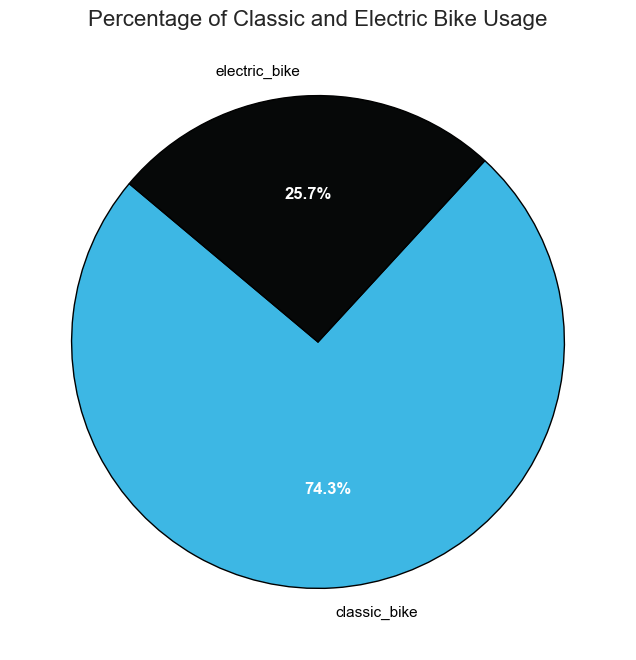

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

bike_percentage = df['rideable_type'].value_counts(normalize=True) * 100

bike_percentage_df = bike_percentage.reset_index()
bike_percentage_df.columns = ['rideable_type', 'percentage'] 

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, 8))

colors = {'electric_bike': '#060808',
          'classic_bike': '#3DB7E4'}

color_list_bike = [colors[bike] for bike in bike_percentage_df['rideable_type']]

wedges, texts, autotexts = ax.pie(member_percentage_df['percentage'], labels=bike_percentage_df['rideable_type'],
                                  autopct='%1.1f%%', startangle=140, colors=color_list_bike, wedgeprops={'edgecolor': 'black'})

for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

ax.set_title('Percentage of Classic and Electric Bike Usage', fontsize=16)

plt.show()

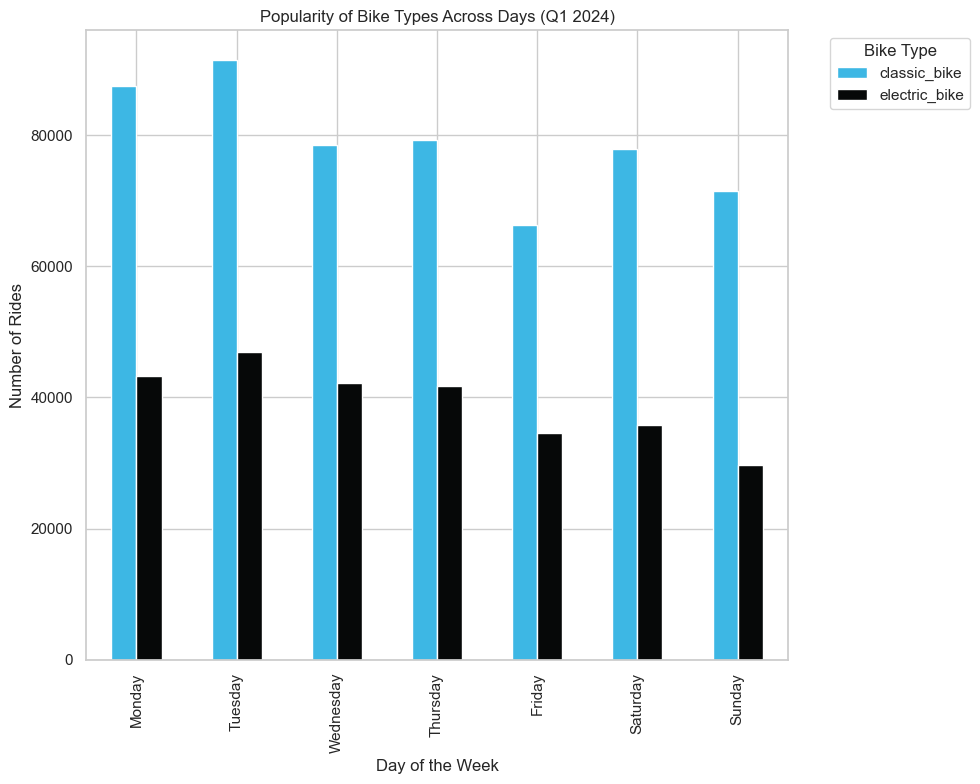

In [53]:
warnings.filterwarnings('ignore', message="The default of observed=False is deprecated and will be changed to True in a future version of pandas.")

# Group data by day and rideable_type, counting the number of rides
bikes_popularity_day = df.groupby(['day', 'rideable_type'], as_index=False)['ride_id'].count()

# Create a pivot table to get the counts for each bike type per day
pivot_table = bikes_popularity_day.pivot_table(
    index='day',
    columns='rideable_type',
    values='ride_id',
    aggfunc='sum',
    fill_value=0
)

# Plotting the data
pivot_table.plot(kind='bar', figsize=(10, 8), color=[colors['classic_bike'], colors['electric_bike']])

plt.title('Popularity of Bike Types Across Days (Q1 2024)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.legend(title='Bike Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Among the three different bikes available, the majority chose and used the **electric bike**, this result is applicable for both casual and membered riders. This might happen due to the **convenience** of electric bike compared to the classic bike.

/var/folders/5p/y6jjtmr56gdb28z4mrs_86440000gn/T/ipykernel_13880/4214824695.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day', y='ride_id', hue='rideable_type', data=rideable_types_by_membership_day,


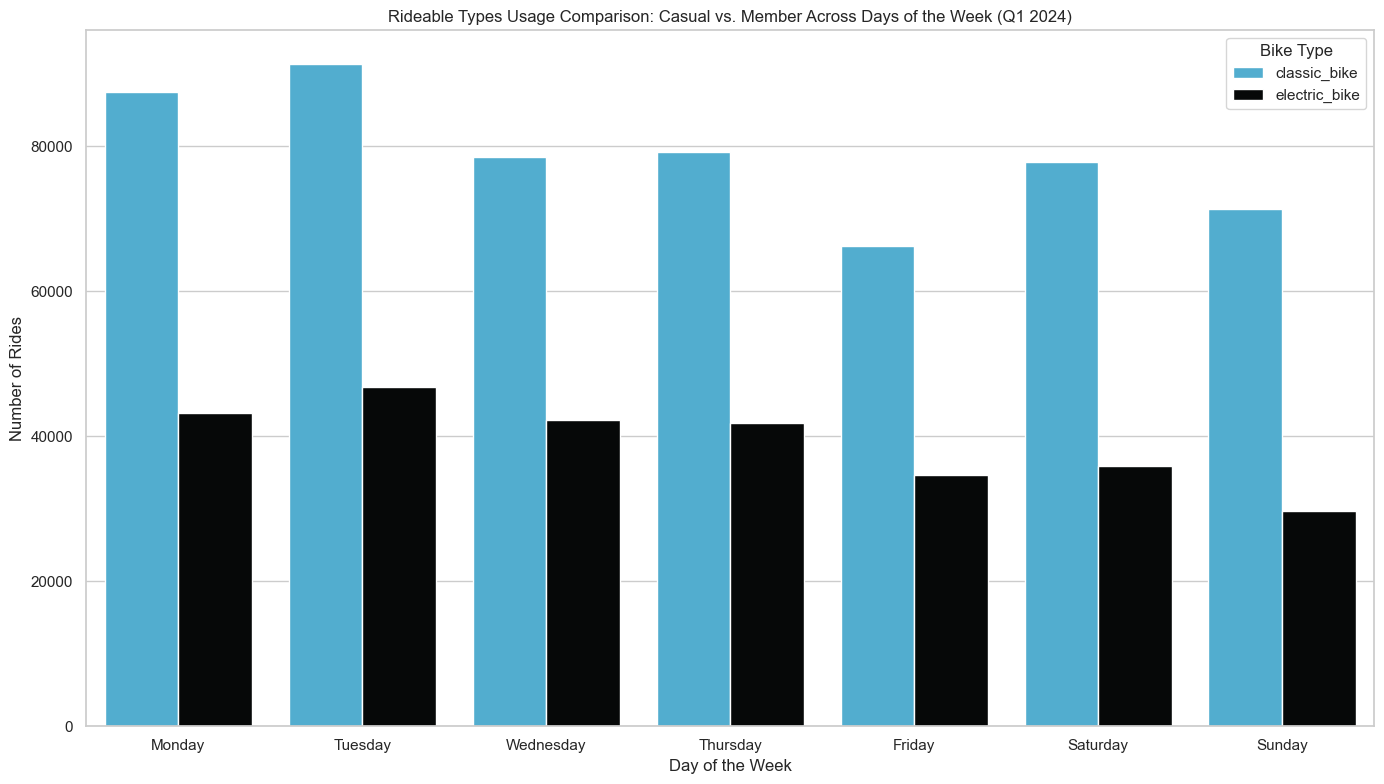

In [58]:
# Suppress specific warnings
warnings.filterwarnings('ignore', message="The default of observed=False is deprecated and will be changed to True in a future version of pandas.")

# Define the colors for each bike type
colors = {'electric_bike': '#060808', 'classic_bike': '#3DB7E4'}

# Group data by day, member_casual, and rideable_type, counting the number of rides
rideable_types_by_membership_day = df.groupby(['day', 'member_casual', 'rideable_type'], as_index=False)['ride_id'].count()

# Create a color palette
palette = [colors['classic_bike'], colors['electric_bike']]

# Set the seaborn style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='day', y='ride_id', hue='rideable_type', data=rideable_types_by_membership_day, 
            palette=palette, ci=None, estimator=sum, dodge=True)

# Set plot title and labels
plt.title('Rideable Types Usage Comparison: Casual vs. Member Across Days of the Week (Q1 2024)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.legend(title='Bike Type')
plt.tight_layout()

plt.show()

Similarly, when we disregard the types of riders, we still obtain that **electric bike** has the highest usage due to its convenience.

# 6. Act

## Conclusion
Based on the analyses, there are several conclusions that can be pulled, which are:
1. Rides or service usage - casual riders usage peaked in between 3 pm to 5 pm due to them commutting back to their home from their office, member riders usage peaked in the morning and afternoon due to exercise and their commute to/from their offices.
2. Casual riders rode their bikes mainly during the weekends, whereas membered riders rode their bikes all week.
3. The number of rides increased from January to April due to weather started to get warmer.
4. Casual riders rode much longer than membered riders.
5. Majority of riders regardless their type of riders had changed their preference to electric bikes, as opposed to the 2020 reports.

## Actionable Insight

There is an opportunity to convert casual riders into annual members, there are 3 recommendations, which are:
1. **Promote Covenient Peak Times for Casual Riders** 
    - Since casual riders peak in the afternoon (3pm to 5 pm), consider offering promotions or incentives during these hours to encourage sign-ups for annual membership which higlights the convenience of having access to bikes after work hours without hassle of renting each time.
    - ***Benefits: Customer Convenience, Customer Satisfaction***
2. **Weekend Membership Offers** 
    - Create weekend specific membership offers targeted at casual riders which emphasize benefits of having unlimited rides thorughout the weekend for a flat fee. Making it more cost-effective than renting multiple times.
    - ***Benefits: Revenue Generation, Increased Sales***
3. **Gradual Introduction to Annual Membership** 
    - Offer trial memberships or a short-term packages to allow casual riders to experience the benefits of an annual membership without a long-term commitment. Moreover, provide clear information on cost savings benefits compared to pay-as-you-go options.
    - ***Benefits: Customer Acquisition and Conversion***
4. **Seasonal Promotions Linked to Weather Changes** 
    - Capitalize on the trend of increased rides as the weather warms up (starting in March). Launch seasonal promotion that coincide with the increase in temperature, offering discount or extra perks for those who convert to annual membership during these months.
    - ***Benefits: Increased Sales***
5. **Highlight the Health and Environmental Benefits** 
    - Educate casual riders on the health and environmental benefits of regular biking of choosing a sustainable mode of transporattion. Position committing to an annual membership as commitment to personal health and environmental responsibility.
    - ***Benefits: PR Points***
6. **Electric Bike Conversion Strategy** 
    - Given the trends of shifting towards electric bikes, offer special incentives or pricing for annual memberships that include access to electric bikes. Highlights the ease of use and accessibility, especially for longer rides or hilly terrains.
    - ***Benefits: Innovation, Market Expansion***
7. **Customer Feedback and Referral Programs** 
    - Implement feedback mechanisms to understand what casual riders value most and use these insights to refine membership offerings. Moreover, incentivize current members (both casual and annual) to refer friends and family with rewards for a longer customer retention.
    - ***Benefits: Customer Feedback, Referral Programs***

By strategically targeting these insights, Divvy can increase the conversion rate of casual riders into annual members which foster long-term customer loyalty and contributing to sustained business growth.